In [ ]:
TRAIN_PATH = 'train.csv'
SAVE_PATH = 'model.pth'

TEST_SIZE = 0.3
RANDOM_STATE = 128
EPOCHS = 200
BATCH_SIZE = 64
LR = 1e-4

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f'Running on device: {device}')

Running on device: cpu


In [ ]:
class LogisticRegression(nn.Module):
    def __init__(self, D_in=1, D_out=1):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(D_in, D_out)

    def forward(self, x):
        y_pred = self.linear(x)

        return y_pred

    def predict(self, x):
        result = self.forward(x)

        return torch.sigmoid(result)

In [ ]:
def shuffle_data(X, y):
    assert len(X) == len(y)

    p = np.random.permutation(len(X))

    return X[p], y[p]

<a id="get_data"></a>
# Get data
[Back to Table of Contents](#toc)

In [ ]:
train_df = pd.read_csv(TRAIN_PATH)
train_df.head()

,filename,distance,label
0,eczrseixwq.mp4,0.494105,1
1,eczrseixwq.mp4,0.495248,1
2,eczrseixwq.mp4,0.518513,1
3,eczrseixwq.mp4,0.497832,1
4,eczrseixwq.mp4,0.507992,1


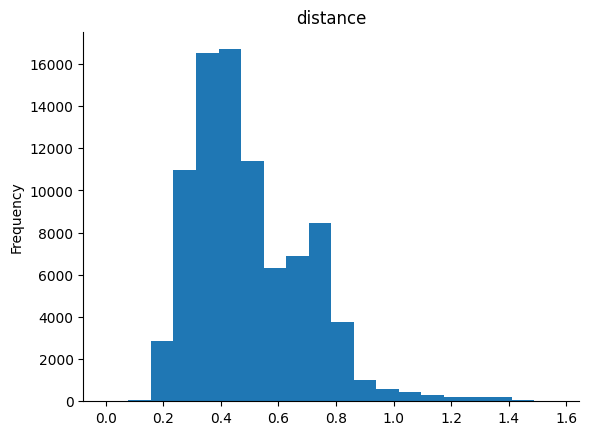

In [ ]:
# @title distance

from matplotlib import pyplot as plt
train_df['distance'].plot(kind='hist', bins=20, title='distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
label_count = train_df.groupby('label').count()['filename']
print(label_count)

pos_weight = torch.ones([1]) * label_count[0]/label_count[1]
print('pos_weight:', pos_weight)

label
0     27476
1    100079
Name: filename, dtype: int64
pos_weight: tensor([0.2745])


In [ ]:
X = train_df['distance'].to_numpy()
y = train_df['label'].to_numpy()

In [ ]:
print(y)

[1 1 1 ... 0 0 0]


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

In [ ]:
X_train = torch.tensor(X_train).to(device).unsqueeze(dim=1).float()
X_val = torch.tensor(X_val).to(device).unsqueeze(dim=1).float()
y_train = torch.tensor(y_train).to(device).unsqueeze(dim=1).float()
y_val = torch.tensor(y_val).to(device).unsqueeze(dim=1).float()

<a id="train_the_classifier"></a>
# Train the classifier
[Back to Table of Contents](#toc)

In [ ]:
classifier = LogisticRegression()
criterion = nn.BCEWithLogitsLoss(reduction='mean', pos_weight=pos_weight) # Improve stability
optimizer = optim.Adam(classifier.parameters(), lr=LR)

n_batches = np.ceil(len(X_train) / BATCH_SIZE).astype(int)
losses = np.zeros(EPOCHS)
val_losses = np.zeros(EPOCHS)
best_val_loss = 1e7

for e in tqdm(range(EPOCHS)):
    batch_losses = np.zeros(n_batches)
    pbar = tqdm(range(n_batches))
    pbar.desc = f'Epoch {e+1}'
    classifier.train()


    X_train, y_train = shuffle_data(X_train, y_train)

    for i in pbar:

        X_batch = X_train[i*BATCH_SIZE:min(len(X_train), (i+1)*BATCH_SIZE)]
        y_batch = y_train[i*BATCH_SIZE:min(len(y_train), (i+1)*BATCH_SIZE)]


        y_pred = classifier(X_batch)


        loss = criterion(y_pred, y_batch)
        batch_losses[i] = loss


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    losses[e] = batch_losses.mean()


    classifier.eval()
    y_val_pred = classifier(X_val)
    val_losses[e] = criterion(y_val_pred, y_val)


    if val_losses[e] < best_val_loss:
        print('Found a better checkpoint!')
        torch.save(classifier.state_dict(), SAVE_PATH)
        best_val_loss = val_losses[e]



    pbar.set_postfix({
        'loss': losses[e],
        'val_loss': val_losses[e]
    })

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

Found a better checkpoint!


  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

  0%|          | 0/1396 [00:00<?, ?it/s]

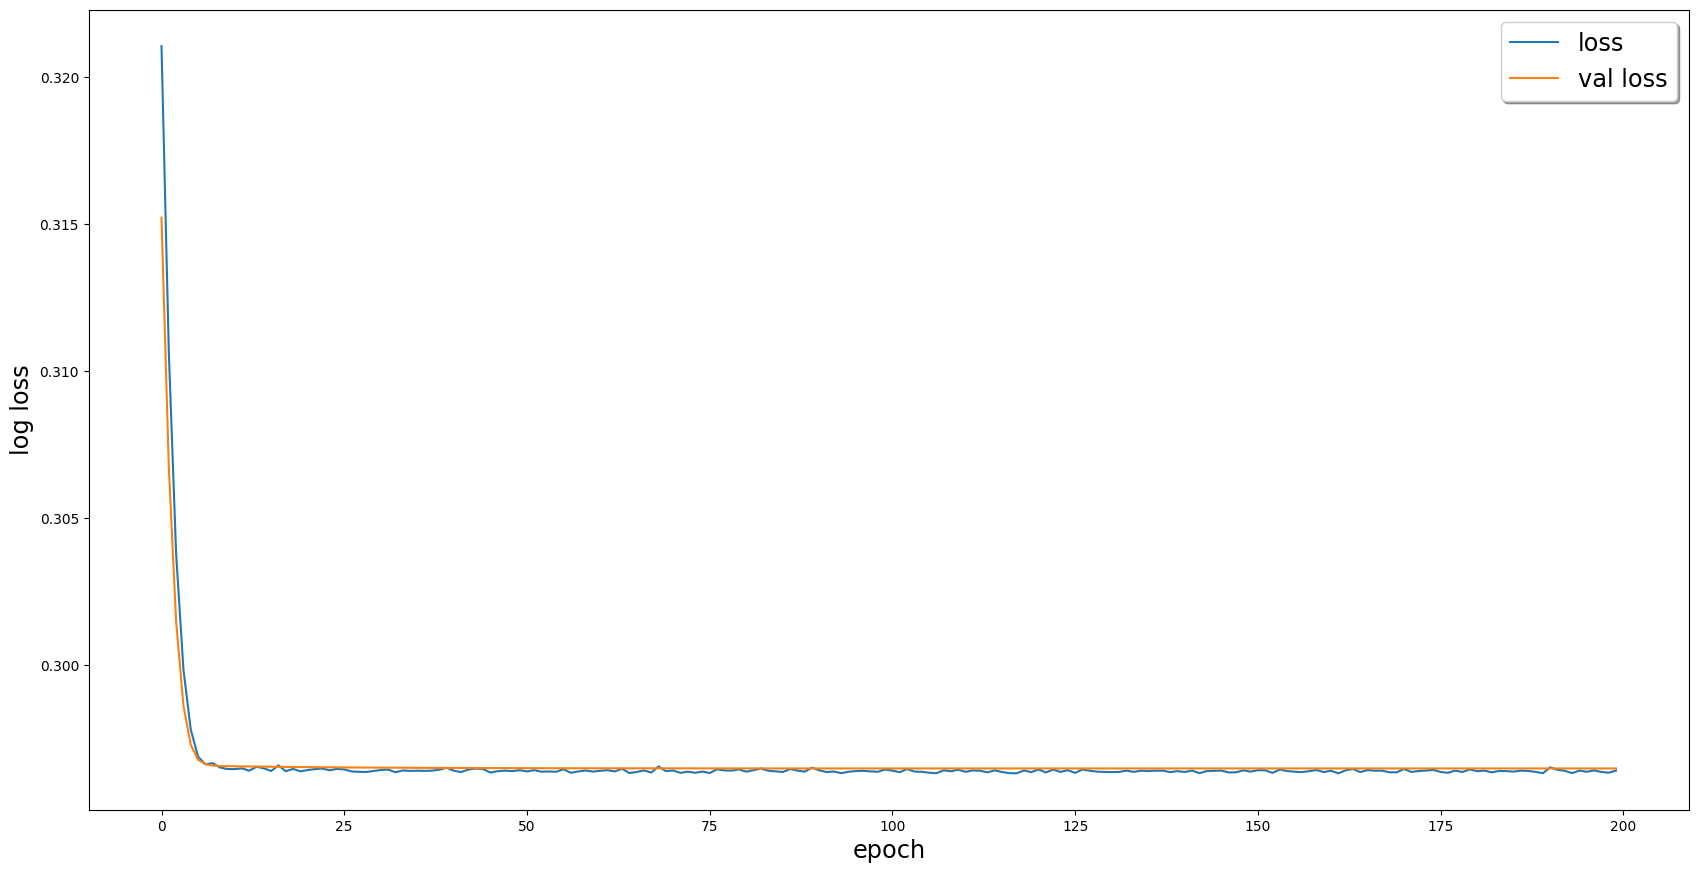

In [ ]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(np.arange(EPOCHS), losses)
ax.plot(np.arange(EPOCHS), val_losses)
ax.set_xlabel('epoch', fontsize='xx-large')
ax.set_ylabel('log loss', fontsize='xx-large')
ax.legend(
    ['loss', 'val loss'],
    loc='upper right',
    fontsize='xx-large',
    shadow=True
)
plt.show()

In [ ]:
print(X_batch.shape)


torch.Size([64, 1, 1])


In [ ]:
X_batch = X_batch.unsqueeze(1)  # Add channel dimension if grayscale


In [ ]:
from sklearn.utils import shuffle
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import efficientnet_b4

# Define your custom CNN model
class CustomCNN(nn.Module):
    # Define layers here
    pass

# Initialize models
efficient_net = efficientnet_b4(pretrained=True)
xception_net = xception(pretrained=True)
custom_cnn = CustomCNN()

# Choose the model for spot checking
models = {
    'LogisticRegression': LogisticRegression(),
    'EfficientNet': efficient_net,
    'XceptionNet': xception_net,
    'CustomCNN': custom_cnn
}

# Loop through models
for model_name, model in models.items():
    criterion = nn.BCEWithLogitsLoss(reduction='mean') # Define pos_weight if needed
    optimizer = optim.Adam(model.parameters(), lr=0.001) # Adjust learning rate if needed

    n_batches = np.ceil(len(X_train) / BATCH_SIZE).astype(int)
    losses = np.zeros(EPOCHS)
    val_losses = np.zeros(EPOCHS)
    best_val_loss = 1e7

    for e in tqdm(range(EPOCHS), desc=f'Training {model_name}'):
        model.train()
        # Shuffle training data
        X_train, y_train = shuffle(X_train, y_train)

        for i in range(n_batches):
            # Get batch
            X_batch = X_train[i*BATCH_SIZE:min(len(X_train), (i+1)*BATCH_SIZE)]
            y_batch = y_train[i*BATCH_SIZE:min(len(y_train), (i+1)*BATCH_SIZE)]

            # Make prediction
            y_pred = model(X_batch)

            # Compute loss
            loss = criterion(y_pred, y_batch)
            losses[e] += loss.item()

            # Zero gradients, perform a backward pass, and update the weights
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Compute average loss for the epoch
        losses[e] /= n_batches

        # Validation step
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)
            val_losses[e] = val_loss.item()

        # Save model based on the best val loss
        if val_losses[e] < best_val_loss:
            print(f'Found a better checkpoint for {model_name}!')
            torch.save(model.state_dict(), f'{model_name}_checkpoint.pth')
            best_val_loss = val_losses[e]

        # Display loss information
        print(f'Epoch {e+1}/{EPOCHS} - Loss: {losses[e]:.4f}, Val Loss: {val_losses[e]:.4f}')


NameError: name 'xception' is not defined

In [ ]:
from sklearn.utils import shuffle
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import efficientnet_b4

# Define your custom CNN model
class CustomCNN(nn.Module):
    # Define layers here
    pass

# Initialize models
efficient_net = efficientnet_b4(pretrained=True)
#xception_net = xception(pretrained=True)
custom_cnn = CustomCNN()

# Choose the model for spot checking
models = {
    #'LogisticRegression': LogisticRegression(),
    'EfficientNet': efficient_net,
    #'XceptionNet': xception_net,
    'CustomCNN': custom_cnn
}

# Loop through models
for model_name, model in models.items():
    criterion = nn.BCEWithLogitsLoss(reduction='mean') # Define pos_weight if needed
    optimizer = optim.Adam(model.parameters(), lr=0.001) # Adjust learning rate if needed

    n_batches = np.ceil(len(X_train) / BATCH_SIZE).astype(int)
    losses = np.zeros(EPOCHS)
    val_losses = np.zeros(EPOCHS)
    best_val_loss = 1e7

    for e in tqdm(range(EPOCHS), desc=f'Training {model_name}'):
        model.train()
        # Shuffle training data
        X_train, y_train = shuffle(X_train, y_train)

        for i in range(n_batches):
            # Get batch
            X_batch = X_train[i*BATCH_SIZE:min(len(X_train), (i+1)*BATCH_SIZE)]
            y_batch = y_train[i*BATCH_SIZE:min(len(y_train), (i+1)*BATCH_SIZE)]

            # Make prediction
            y_pred = model(X_batch)

            # Compute loss
            loss = criterion(y_pred, y_batch)
            losses[e] += loss.item()

            # Zero gradients, perform a backward pass, and update the weights
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Compute average loss for the epoch
        losses[e] /= n_batches

        # Validation step
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)
            val_losses[e] = val_loss.item()

        # Save model based on the best val loss
        if val_losses[e] < best_val_loss:
            print(f'Found a better checkpoint for {model_name}!')
            torch.save(model.state_dict(), f'{model_name}_checkpoint.pth')
            best_val_loss = val_losses[e]

        # Display loss information
        print(f'Epoch {e+1}/{EPOCHS} - Loss: {losses[e]:.4f}, Val Loss: {val_losses[e]:.4f}')


Training EfficientNet:   0%|          | 0/200 [00:00<?, ?it/s]


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [64, 1]

In [ ]:
from sklearn.utils import shuffle
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18, resnet50, vgg16, densenet121

# Define your custom CNN model
class CustomCNN(nn.Module):
    # Define layers here
    pass

# Initialize models
resnet_18 = resnet18(pretrained=True)
resnet_50 = resnet50(pretrained=True)
vgg_16 = vgg16(pretrained=True)
densenet_121 = densenet121(pretrained=True)
custom_cnn = CustomCNN()

# Choose the model for spot checking
models = {
    'LogisticRegression': LogisticRegression(),
    'ResNet18': resnet_18,
    'ResNet50': resnet_50,
    'VGG16': vgg_16,
    'DenseNet121': densenet_121,
    'CustomCNN': custom_cnn
}

# Loop through models
for model_name, model in models.items():
    criterion = nn.BCEWithLogitsLoss(reduction='mean') # Define pos_weight if needed
    optimizer = optim.Adam(model.parameters(), lr=0.001) # Adjust learning rate if needed

    n_batches = np.ceil(len(X_train) / BATCH_SIZE).astype(int)
    losses = np.zeros(EPOCHS)
    val_losses = np.zeros(EPOCHS)
    best_val_loss = 1e7

    for e in tqdm(range(EPOCHS), desc=f'Training {model_name}'):
        model.train()
        # Shuffle training data
        X_train, y_train = shuffle(X_train, y_train)

        for i in range(n_batches):
            # Get batch
            X_batch = X_train[i*BATCH_SIZE:min(len(X_train), (i+1)*BATCH_SIZE)]
            y_batch = y_train[i*BATCH_SIZE:min(len(y_train), (i+1)*BATCH_SIZE)]

            # Make prediction
            y_pred = model(X_batch)

            # Compute loss
            loss = criterion(y_pred, y_batch)
            losses[e] += loss.item()

            # Zero gradients, perform a backward pass, and update the weights
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Compute average loss for the epoch
        losses[e] /= n_batches

        # Validation step
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)
            val_losses[e] = val_loss.item()

        # Save model based on the best val loss
        if val_losses[e] < best_val_loss:
            print(f'Found a better checkpoint for {model_name}!')
            torch.save(model.state_dict(), f'{model_name}_checkpoint.pth')
            best_val_loss = val_losses[e]

        # Display loss information
        print(f'Epoch {e+1}/{EPOCHS} - Loss: {losses[e]:.4f}, Val Loss: {val_losses[e]:.4f}')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 102MB/s] 
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Download

Found a better checkpoint for LogisticRegression!
Epoch 1/200 - Loss: 0.5268, Val Loss: 0.5204


Training LogisticRegression:   1%|          | 2/200 [00:06<11:03,  3.35s/it]

Found a better checkpoint for LogisticRegression!
Epoch 2/200 - Loss: 0.5198, Val Loss: 0.5195


Training LogisticRegression:   2%|▏         | 3/200 [00:10<12:40,  3.86s/it]

Found a better checkpoint for LogisticRegression!
Epoch 3/200 - Loss: 0.5190, Val Loss: 0.5189


Training LogisticRegression:   2%|▏         | 4/200 [00:13<10:27,  3.20s/it]

Found a better checkpoint for LogisticRegression!
Epoch 4/200 - Loss: 0.5188, Val Loss: 0.5185


Training LogisticRegression:   2%|▎         | 5/200 [00:15<09:52,  3.04s/it]

Found a better checkpoint for LogisticRegression!
Epoch 5/200 - Loss: 0.5182, Val Loss: 0.5182


Training LogisticRegression:   3%|▎         | 6/200 [00:16<07:40,  2.37s/it]

Found a better checkpoint for LogisticRegression!
Epoch 6/200 - Loss: 0.5182, Val Loss: 0.5181


Training LogisticRegression:   4%|▎         | 7/200 [00:18<06:14,  1.94s/it]

Found a better checkpoint for LogisticRegression!
Epoch 7/200 - Loss: 0.5177, Val Loss: 0.5180


Training LogisticRegression:   4%|▍         | 8/200 [00:19<05:17,  1.66s/it]

Found a better checkpoint for LogisticRegression!
Epoch 8/200 - Loss: 0.5179, Val Loss: 0.5179


Training LogisticRegression:   4%|▍         | 9/200 [00:20<04:39,  1.46s/it]

Epoch 9/200 - Loss: 0.5178, Val Loss: 0.5179


Training LogisticRegression:   5%|▌         | 10/200 [00:21<04:30,  1.42s/it]

Found a better checkpoint for LogisticRegression!
Epoch 10/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:   6%|▌         | 11/200 [00:22<04:33,  1.45s/it]

Found a better checkpoint for LogisticRegression!
Epoch 11/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:   6%|▌         | 12/200 [00:24<04:10,  1.33s/it]

Epoch 12/200 - Loss: 0.5177, Val Loss: 0.5179


Training LogisticRegression:   6%|▋         | 13/200 [00:25<04:00,  1.29s/it]

Epoch 13/200 - Loss: 0.5180, Val Loss: 0.5178


Training LogisticRegression:   7%|▋         | 14/200 [00:26<03:47,  1.22s/it]

Found a better checkpoint for LogisticRegression!
Epoch 14/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:   8%|▊         | 15/200 [00:27<03:38,  1.18s/it]

Found a better checkpoint for LogisticRegression!
Epoch 15/200 - Loss: 0.5180, Val Loss: 0.5178


Training LogisticRegression:   8%|▊         | 16/200 [00:28<03:30,  1.14s/it]

Epoch 16/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:   8%|▊         | 17/200 [00:29<03:25,  1.12s/it]

Epoch 17/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:   9%|▉         | 18/200 [00:30<03:21,  1.11s/it]

Found a better checkpoint for LogisticRegression!
Epoch 18/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  10%|▉         | 19/200 [00:31<03:20,  1.11s/it]

Epoch 19/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  10%|█         | 20/200 [00:32<03:18,  1.10s/it]

Epoch 20/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  10%|█         | 21/200 [00:34<03:29,  1.17s/it]

Epoch 21/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  11%|█         | 22/200 [00:35<03:36,  1.22s/it]

Epoch 22/200 - Loss: 0.5179, Val Loss: 0.5178


Training LogisticRegression:  12%|█▏        | 23/200 [00:36<03:23,  1.15s/it]

Epoch 23/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  12%|█▏        | 24/200 [00:37<03:15,  1.11s/it]

Epoch 24/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  12%|█▎        | 25/200 [00:38<03:09,  1.08s/it]

Epoch 25/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  13%|█▎        | 26/200 [00:39<03:06,  1.07s/it]

Epoch 26/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  14%|█▎        | 27/200 [00:40<03:04,  1.07s/it]

Epoch 27/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  14%|█▍        | 28/200 [00:41<03:01,  1.06s/it]

Epoch 28/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  14%|█▍        | 29/200 [00:42<02:58,  1.04s/it]

Epoch 29/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  15%|█▌        | 30/200 [00:43<02:56,  1.04s/it]

Epoch 30/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  16%|█▌        | 31/200 [00:44<02:55,  1.04s/it]

Epoch 31/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  16%|█▌        | 32/200 [00:45<03:04,  1.10s/it]

Epoch 32/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  16%|█▋        | 33/200 [00:47<03:22,  1.21s/it]

Epoch 33/200 - Loss: 0.5179, Val Loss: 0.5178


Training LogisticRegression:  17%|█▋        | 34/200 [00:48<03:12,  1.16s/it]

Epoch 34/200 - Loss: 0.5175, Val Loss: 0.5179


Training LogisticRegression:  18%|█▊        | 35/200 [00:49<03:05,  1.13s/it]

Epoch 35/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  18%|█▊        | 36/200 [00:50<03:02,  1.11s/it]

Epoch 36/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  18%|█▊        | 37/200 [00:51<02:58,  1.10s/it]

Epoch 37/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  19%|█▉        | 38/200 [00:52<02:55,  1.08s/it]

Epoch 38/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  20%|█▉        | 39/200 [00:53<02:51,  1.07s/it]

Epoch 39/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  20%|██        | 40/200 [00:54<02:50,  1.06s/it]

Epoch 40/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  20%|██        | 41/200 [00:55<02:48,  1.06s/it]

Epoch 41/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  21%|██        | 42/200 [00:56<02:46,  1.06s/it]

Epoch 42/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  22%|██▏       | 43/200 [00:58<02:55,  1.12s/it]

Epoch 43/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  22%|██▏       | 44/200 [00:59<03:11,  1.22s/it]

Epoch 44/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  22%|██▎       | 45/200 [01:00<03:02,  1.18s/it]

Epoch 45/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  23%|██▎       | 46/200 [01:01<02:58,  1.16s/it]

Epoch 46/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  24%|██▎       | 47/200 [01:02<02:53,  1.14s/it]

Epoch 47/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  24%|██▍       | 48/200 [01:03<02:50,  1.12s/it]

Epoch 48/200 - Loss: 0.5178, Val Loss: 0.5179


Training LogisticRegression:  24%|██▍       | 49/200 [01:04<02:46,  1.10s/it]

Epoch 49/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  25%|██▌       | 50/200 [01:06<02:43,  1.09s/it]

Epoch 50/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  26%|██▌       | 51/200 [01:07<02:40,  1.08s/it]

Epoch 51/200 - Loss: 0.5179, Val Loss: 0.5178


Training LogisticRegression:  26%|██▌       | 52/200 [01:08<02:38,  1.07s/it]

Epoch 52/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  26%|██▋       | 53/200 [01:09<02:35,  1.06s/it]

Epoch 53/200 - Loss: 0.5177, Val Loss: 0.5179


Training LogisticRegression:  27%|██▋       | 54/200 [01:10<02:44,  1.13s/it]

Epoch 54/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  28%|██▊       | 55/200 [01:11<02:56,  1.22s/it]

Epoch 55/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  28%|██▊       | 56/200 [01:12<02:47,  1.16s/it]

Epoch 56/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  28%|██▊       | 57/200 [01:13<02:40,  1.12s/it]

Epoch 57/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  29%|██▉       | 58/200 [01:14<02:35,  1.09s/it]

Epoch 58/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  30%|██▉       | 59/200 [01:16<02:32,  1.08s/it]

Epoch 59/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  30%|███       | 60/200 [01:17<02:31,  1.08s/it]

Epoch 60/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  30%|███       | 61/200 [01:18<02:28,  1.07s/it]

Epoch 61/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  31%|███       | 62/200 [01:19<02:26,  1.06s/it]

Epoch 62/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  32%|███▏      | 63/200 [01:20<02:24,  1.06s/it]

Epoch 63/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  32%|███▏      | 64/200 [01:21<02:23,  1.05s/it]

Epoch 64/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  32%|███▎      | 65/200 [01:22<02:30,  1.11s/it]

Epoch 65/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  33%|███▎      | 66/200 [01:23<02:43,  1.22s/it]

Epoch 66/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  34%|███▎      | 67/200 [01:25<02:36,  1.18s/it]

Epoch 67/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  34%|███▍      | 68/200 [01:26<02:30,  1.14s/it]

Epoch 68/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  34%|███▍      | 69/200 [01:27<02:24,  1.11s/it]

Epoch 69/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  35%|███▌      | 70/200 [01:28<02:21,  1.09s/it]

Epoch 70/200 - Loss: 0.5179, Val Loss: 0.5178


Training LogisticRegression:  36%|███▌      | 71/200 [01:29<02:19,  1.08s/it]

Epoch 71/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  36%|███▌      | 72/200 [01:30<02:17,  1.08s/it]

Epoch 72/200 - Loss: 0.5176, Val Loss: 0.5179


Training LogisticRegression:  36%|███▋      | 73/200 [01:31<02:15,  1.07s/it]

Epoch 73/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  37%|███▋      | 74/200 [01:32<02:13,  1.06s/it]

Epoch 74/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  38%|███▊      | 75/200 [01:33<02:11,  1.05s/it]

Epoch 75/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  38%|███▊      | 76/200 [01:34<02:15,  1.09s/it]

Epoch 76/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  38%|███▊      | 77/200 [01:36<02:26,  1.19s/it]

Epoch 77/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  39%|███▉      | 78/200 [01:37<02:23,  1.17s/it]

Epoch 78/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  40%|███▉      | 79/200 [01:38<02:17,  1.14s/it]

Epoch 79/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  40%|████      | 80/200 [01:39<02:13,  1.11s/it]

Epoch 80/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  40%|████      | 81/200 [01:40<02:09,  1.09s/it]

Epoch 81/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  41%|████      | 82/200 [01:41<02:08,  1.09s/it]

Epoch 82/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  42%|████▏     | 83/200 [01:42<02:05,  1.07s/it]

Epoch 83/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  42%|████▏     | 84/200 [01:43<02:03,  1.07s/it]

Epoch 84/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  42%|████▎     | 85/200 [01:44<02:00,  1.05s/it]

Epoch 85/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  43%|████▎     | 86/200 [01:45<01:58,  1.04s/it]

Epoch 86/200 - Loss: 0.5181, Val Loss: 0.5178


Training LogisticRegression:  44%|████▎     | 87/200 [01:46<02:00,  1.07s/it]

Epoch 87/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  44%|████▍     | 88/200 [01:48<02:09,  1.16s/it]

Epoch 88/200 - Loss: 0.5179, Val Loss: 0.5178


Training LogisticRegression:  44%|████▍     | 89/200 [01:49<02:09,  1.17s/it]

Epoch 89/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  45%|████▌     | 90/200 [01:50<02:04,  1.13s/it]

Epoch 90/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  46%|████▌     | 91/200 [01:51<02:01,  1.12s/it]

Epoch 91/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  46%|████▌     | 92/200 [01:52<01:56,  1.08s/it]

Epoch 92/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  46%|████▋     | 93/200 [01:53<01:53,  1.06s/it]

Epoch 93/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  47%|████▋     | 94/200 [01:54<01:49,  1.04s/it]

Epoch 94/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  48%|████▊     | 95/200 [01:55<01:48,  1.03s/it]

Epoch 95/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  48%|████▊     | 96/200 [01:56<01:47,  1.04s/it]

Epoch 96/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  48%|████▊     | 97/200 [01:57<01:46,  1.03s/it]

Epoch 97/200 - Loss: 0.5179, Val Loss: 0.5178


Training LogisticRegression:  49%|████▉     | 98/200 [01:58<01:45,  1.04s/it]

Epoch 98/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  50%|████▉     | 99/200 [01:59<01:53,  1.13s/it]

Epoch 99/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  50%|█████     | 100/200 [02:01<01:59,  1.20s/it]

Epoch 100/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  50%|█████     | 101/200 [02:02<02:08,  1.29s/it]

Epoch 101/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  51%|█████     | 102/200 [02:03<01:59,  1.22s/it]

Epoch 102/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  52%|█████▏    | 103/200 [02:04<01:53,  1.17s/it]

Epoch 103/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  52%|█████▏    | 104/200 [02:05<01:49,  1.14s/it]

Epoch 104/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  52%|█████▎    | 105/200 [02:06<01:44,  1.10s/it]

Epoch 105/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  53%|█████▎    | 106/200 [02:07<01:41,  1.08s/it]

Epoch 106/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  54%|█████▎    | 107/200 [02:08<01:38,  1.06s/it]

Epoch 107/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  54%|█████▍    | 108/200 [02:09<01:36,  1.05s/it]

Epoch 108/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  55%|█████▍    | 109/200 [02:11<01:57,  1.29s/it]

Epoch 109/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  55%|█████▌    | 110/200 [02:13<01:59,  1.33s/it]

Epoch 110/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  56%|█████▌    | 111/200 [02:14<01:49,  1.23s/it]

Epoch 111/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  56%|█████▌    | 112/200 [02:15<01:43,  1.17s/it]

Epoch 112/200 - Loss: 0.5179, Val Loss: 0.5178


Training LogisticRegression:  56%|█████▋    | 113/200 [02:16<01:37,  1.12s/it]

Epoch 113/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  57%|█████▋    | 114/200 [02:17<01:34,  1.10s/it]

Epoch 114/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  57%|█████▊    | 115/200 [02:18<01:32,  1.09s/it]

Epoch 115/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  58%|█████▊    | 116/200 [02:19<01:30,  1.08s/it]

Epoch 116/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  58%|█████▊    | 117/200 [02:20<01:29,  1.08s/it]

Epoch 117/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  59%|█████▉    | 118/200 [02:21<01:28,  1.08s/it]

Epoch 118/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  60%|█████▉    | 119/200 [02:22<01:27,  1.08s/it]

Epoch 119/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  60%|██████    | 120/200 [02:24<01:32,  1.16s/it]

Epoch 120/200 - Loss: 0.5178, Val Loss: 0.5179


Training LogisticRegression:  60%|██████    | 121/200 [02:25<01:38,  1.24s/it]

Epoch 121/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  61%|██████    | 122/200 [02:26<01:32,  1.18s/it]

Epoch 122/200 - Loss: 0.5177, Val Loss: 0.5179


Training LogisticRegression:  62%|██████▏   | 123/200 [02:27<01:27,  1.13s/it]

Epoch 123/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  62%|██████▏   | 124/200 [02:28<01:24,  1.11s/it]

Epoch 124/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  62%|██████▎   | 125/200 [02:29<01:22,  1.10s/it]

Epoch 125/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  63%|██████▎   | 126/200 [02:30<01:19,  1.08s/it]

Epoch 126/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  64%|██████▎   | 127/200 [02:31<01:17,  1.07s/it]

Epoch 127/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  64%|██████▍   | 128/200 [02:32<01:16,  1.06s/it]

Epoch 128/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  64%|██████▍   | 129/200 [02:33<01:15,  1.06s/it]

Epoch 129/200 - Loss: 0.5176, Val Loss: 0.5179


Training LogisticRegression:  65%|██████▌   | 130/200 [02:34<01:13,  1.05s/it]

Epoch 130/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  66%|██████▌   | 131/200 [02:36<01:18,  1.13s/it]

Epoch 131/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  66%|██████▌   | 132/200 [02:37<01:23,  1.23s/it]

Epoch 132/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  66%|██████▋   | 133/200 [02:38<01:18,  1.17s/it]

Epoch 133/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  67%|██████▋   | 134/200 [02:39<01:14,  1.13s/it]

Epoch 134/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  68%|██████▊   | 135/200 [02:40<01:11,  1.10s/it]

Epoch 135/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  68%|██████▊   | 136/200 [02:41<01:09,  1.08s/it]

Epoch 136/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  68%|██████▊   | 137/200 [02:42<01:08,  1.09s/it]

Epoch 137/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  69%|██████▉   | 138/200 [02:43<01:07,  1.09s/it]

Epoch 138/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  70%|██████▉   | 139/200 [02:45<01:06,  1.08s/it]

Epoch 139/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  70%|███████   | 140/200 [02:46<01:04,  1.07s/it]

Epoch 140/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  70%|███████   | 141/200 [02:47<01:02,  1.06s/it]

Epoch 141/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  71%|███████   | 142/200 [02:48<01:04,  1.11s/it]

Epoch 142/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  72%|███████▏  | 143/200 [02:49<01:09,  1.22s/it]

Epoch 143/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  72%|███████▏  | 144/200 [02:50<01:05,  1.16s/it]

Epoch 144/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  72%|███████▎  | 145/200 [02:51<01:01,  1.12s/it]

Epoch 145/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  73%|███████▎  | 146/200 [02:52<00:58,  1.09s/it]

Epoch 146/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  74%|███████▎  | 147/200 [02:53<00:57,  1.08s/it]

Epoch 147/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  74%|███████▍  | 148/200 [02:54<00:55,  1.06s/it]

Epoch 148/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  74%|███████▍  | 149/200 [02:55<00:53,  1.05s/it]

Epoch 149/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  75%|███████▌  | 150/200 [02:57<00:52,  1.05s/it]

Epoch 150/200 - Loss: 0.5179, Val Loss: 0.5178


Training LogisticRegression:  76%|███████▌  | 151/200 [02:58<00:51,  1.04s/it]

Epoch 151/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  76%|███████▌  | 152/200 [02:59<00:49,  1.04s/it]

Epoch 152/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  76%|███████▋  | 153/200 [03:00<00:50,  1.08s/it]

Epoch 153/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  77%|███████▋  | 154/200 [03:01<00:54,  1.19s/it]

Epoch 154/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  78%|███████▊  | 155/200 [03:02<00:52,  1.18s/it]

Epoch 155/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  78%|███████▊  | 156/200 [03:03<00:49,  1.13s/it]

Epoch 156/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  78%|███████▊  | 157/200 [03:04<00:47,  1.10s/it]

Epoch 157/200 - Loss: 0.5176, Val Loss: 0.5179


Training LogisticRegression:  79%|███████▉  | 158/200 [03:05<00:45,  1.09s/it]

Epoch 158/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  80%|███████▉  | 159/200 [03:07<00:44,  1.08s/it]

Epoch 159/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  80%|████████  | 160/200 [03:08<00:42,  1.07s/it]

Epoch 160/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  80%|████████  | 161/200 [03:09<00:41,  1.06s/it]

Epoch 161/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  81%|████████  | 162/200 [03:10<00:39,  1.05s/it]

Epoch 162/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  82%|████████▏ | 163/200 [03:11<00:38,  1.04s/it]

Epoch 163/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  82%|████████▏ | 164/200 [03:12<00:38,  1.06s/it]

Epoch 164/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  82%|████████▎ | 165/200 [03:13<00:40,  1.16s/it]

Epoch 165/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  83%|████████▎ | 166/200 [03:14<00:40,  1.19s/it]

Epoch 166/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  84%|████████▎ | 167/200 [03:15<00:37,  1.15s/it]

Epoch 167/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  84%|████████▍ | 168/200 [03:17<00:35,  1.12s/it]

Epoch 168/200 - Loss: 0.5179, Val Loss: 0.5178


Training LogisticRegression:  84%|████████▍ | 169/200 [03:18<00:34,  1.11s/it]

Epoch 169/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  85%|████████▌ | 170/200 [03:19<00:32,  1.10s/it]

Epoch 170/200 - Loss: 0.5177, Val Loss: 0.5179


Training LogisticRegression:  86%|████████▌ | 171/200 [03:20<00:31,  1.08s/it]

Epoch 171/200 - Loss: 0.5177, Val Loss: 0.5179


Training LogisticRegression:  86%|████████▌ | 172/200 [03:21<00:30,  1.07s/it]

Epoch 172/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  86%|████████▋ | 173/200 [03:22<00:29,  1.08s/it]

Epoch 173/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  87%|████████▋ | 174/200 [03:23<00:28,  1.08s/it]

Epoch 174/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  88%|████████▊ | 175/200 [03:24<00:27,  1.10s/it]

Epoch 175/200 - Loss: 0.5177, Val Loss: 0.5179


Training LogisticRegression:  88%|████████▊ | 176/200 [03:26<00:29,  1.21s/it]

Epoch 176/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  88%|████████▊ | 177/200 [03:27<00:28,  1.22s/it]

Epoch 177/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  89%|████████▉ | 178/200 [03:28<00:25,  1.18s/it]

Epoch 178/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  90%|████████▉ | 179/200 [03:29<00:24,  1.14s/it]

Epoch 179/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  90%|█████████ | 180/200 [03:30<00:22,  1.12s/it]

Epoch 180/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  90%|█████████ | 181/200 [03:31<00:21,  1.12s/it]

Epoch 181/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  91%|█████████ | 182/200 [03:32<00:19,  1.10s/it]

Epoch 182/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  92%|█████████▏| 183/200 [03:33<00:18,  1.09s/it]

Epoch 183/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  92%|█████████▏| 184/200 [03:34<00:17,  1.08s/it]

Epoch 184/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  92%|█████████▎| 185/200 [03:35<00:16,  1.07s/it]

Epoch 185/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  93%|█████████▎| 186/200 [03:37<00:15,  1.11s/it]

Epoch 186/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  94%|█████████▎| 187/200 [03:38<00:15,  1.19s/it]

Epoch 187/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  94%|█████████▍| 188/200 [03:39<00:14,  1.18s/it]

Epoch 188/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  94%|█████████▍| 189/200 [03:40<00:12,  1.15s/it]

Epoch 189/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  95%|█████████▌| 190/200 [03:41<00:11,  1.12s/it]

Epoch 190/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  96%|█████████▌| 191/200 [03:42<00:09,  1.10s/it]

Epoch 191/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  96%|█████████▌| 192/200 [03:43<00:08,  1.08s/it]

Epoch 192/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  96%|█████████▋| 193/200 [03:44<00:07,  1.08s/it]

Epoch 193/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  97%|█████████▋| 194/200 [03:45<00:06,  1.08s/it]

Epoch 194/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression:  98%|█████████▊| 195/200 [03:47<00:05,  1.09s/it]

Epoch 195/200 - Loss: 0.5178, Val Loss: 0.5178


Training LogisticRegression:  98%|█████████▊| 196/200 [03:48<00:04,  1.09s/it]

Epoch 196/200 - Loss: 0.5177, Val Loss: 0.5178


Training LogisticRegression:  98%|█████████▊| 197/200 [03:49<00:03,  1.15s/it]

Epoch 197/200 - Loss: 0.5175, Val Loss: 0.5178


Training LogisticRegression:  99%|█████████▉| 198/200 [03:50<00:02,  1.24s/it]

Epoch 198/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression: 100%|█████████▉| 199/200 [03:52<00:01,  1.20s/it]

Epoch 199/200 - Loss: 0.5176, Val Loss: 0.5178


Training LogisticRegression: 100%|██████████| 200/200 [03:53<00:00,  1.17s/it]


Epoch 200/200 - Loss: 0.5176, Val Loss: 0.5178


Training ResNet18:   0%|          | 0/200 [00:00<?, ?it/s]


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [64, 1]

<a id="validate_the_model"></a>
# Validate the model
[Back to Table of Contents](#toc)

In [ ]:
without_weight_criterion = nn.BCELoss(reduction='mean')

classifier.eval()
with torch.no_grad():
    y_val_pred = classifier.predict(X_val)
    val_loss = without_weight_criterion(y_val_pred, y_val)

print('val loss:', val_loss.detach().numpy())

val loss: 0.6886146


[]

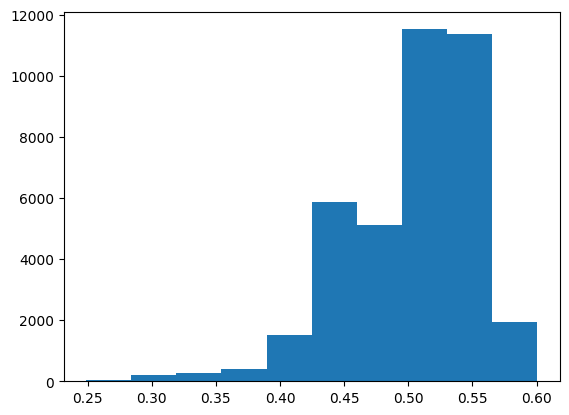

In [ ]:
plt.hist(y_val_pred.squeeze(dim=-1).detach())
plt.plot()

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle competitions download -c deepfake-detection-challenge

100% 4.12G/4.13G [01:07<00:00, 90.8MB/s]
100% 4.13G/4.13G [01:07<00:00, 65.6MB/s]


In [ ]:
!unzip deepfake-detection-challenge.zip

Archive:  deepfake-detection-challenge.zip
  inflating: sample_submission.csv   
  inflating: test_videos/aassnaulhq.mp4  
  inflating: test_videos/aayfryxljh.mp4  
  inflating: test_videos/acazlolrpz.mp4  
  inflating: test_videos/adohdulfwb.mp4  
  inflating: test_videos/ahjnxtiamx.mp4  
  inflating: test_videos/ajiyrjfyzp.mp4  
  inflating: test_videos/aktnlyqpah.mp4  
  inflating: test_videos/alrtntfxtd.mp4  
  inflating: test_videos/aomqqjipcp.mp4  
  inflating: test_videos/apedduehoy.mp4  
  inflating: test_videos/apvzjkvnwn.mp4  
  inflating: test_videos/aqrsylrzgi.mp4  
  inflating: test_videos/axfhbpkdlc.mp4  
  inflating: test_videos/ayipraspbn.mp4  
  inflating: test_videos/bcbqxhziqz.mp4  
  inflating: test_videos/bcvheslzrq.mp4  
  inflating: test_videos/bdshuoldwx.mp4  
  inflating: test_videos/bfdopzvxbi.mp4  
  inflating: test_videos/bfjsthfhbd.mp4  
  inflating: test_videos/bjyaxvggle.mp4  
  inflating: test_videos/bkcyglmfci.mp4  
  inflating: test_videos/bktkwbcawi.m

In [ ]:
!pip install facenet_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
import os
import glob
import torch
import torch.nn as nn
import cv2
from PIL import Image
import numpy as np
import pandas as pd
from tqdm import tqdm
from facenet_pytorch.models.inception_resnet_v1 import InceptionResnetV1, get_torch_home
from facenet_pytorch import MTCNN

TEST_DIR = 'train_sample_videos/'  # Update with the path to your test videos directory
MODEL_PATH = 'model.pth'   # Update with the path to your model checkpoint

BATCH_SIZE = 60
SCALE = 0.25
N_FRAMES = None  # 'None' means using all available frames
DEFAULT_PROB = 0.5

torch_home = get_torch_home()
os.makedirs(os.path.join(torch_home, 'checkpoints'), exist_ok=True)
os.system('cp 20180402-114759-vggface2-logits.pth $torch_home/checkpoints/vggface2_DG3kwML46X.pt')
os.system('cp 20180402-114759-vggface2-features.pth $torch_home/checkpoints/vggface2_G5aNV2VSMn.pt')

if torch.cuda.is_available():
    device = 'cuda:0'
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
else:
    device = 'cpu'
print(f'Running on device: {device}')

class DetectionPipeline:
    def __init__(self, detector, n_frames=None, batch_size=60, resize=None):
        self.detector = detector
        self.n_frames = n_frames
        self.batch_size = batch_size
        self.resize = resize

    def __call__(self, filename):
        v_cap = cv2.VideoCapture(filename)
        v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))

        if self.n_frames is None:
            sample = np.arange(0, v_len)
        else:
            sample = np.linspace(0, v_len - 1, self.n_frames).astype(int)

        faces = []
        frames = []
        for j in range(v_len):
            success = v_cap.grab()
            if j in sample:
                success, frame = v_cap.retrieve()
                if not success:
                    continue
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frame = Image.fromarray(frame)

                if self.resize is not None:
                    frame = frame.resize([int(d * self.resize) for d in frame.size])
                frames.append(frame)

                if len(frames) % self.batch_size == 0 or j == sample[-1]:
                    faces.extend(self.detector(frames))
                    frames = []

        v_cap.release()
        return faces

class LogisticRegression(nn.Module):
    def __init__(self, D_in=1, D_out=1):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(D_in, D_out)

    def forward(self, x):
        y_pred = self.linear(x)
        y_pred = torch.sigmoid(y_pred)
        return y_pred

def process_faces(faces, feature_extractor):
    faces = [f for f in faces if f is not None]
    if len(faces) == 0:
        return None
    faces = torch.cat(faces).to(device)
    embeddings = feature_extractor(faces)
    centroid = embeddings.mean(dim=0)
    x = (embeddings - centroid).norm(dim=1).cpu().numpy()
    return x

all_test_videos = glob.glob(os.path.join(TEST_DIR, '*.mp4'))

face_detector = MTCNN(margin=14, keep_all=True, factor=0.5, device=device).eval()
feature_extractor = InceptionResnetV1(pretrained='vggface2', device=device).eval()
detection_pipeline = DetectionPipeline(detector=face_detector, n_frames=N_FRAMES, batch_size=BATCH_SIZE, resize=SCALE)

X_test = []

with torch.no_grad():
    for path in tqdm(all_test_videos):
        try:
            faces = detection_pipeline(path)
            distances = process_faces(faces, feature_extractor)
            X_test.append(distances)
        except:
            X_test.append(None)

submission = []

with torch.no_grad():
    classifier = LogisticRegression()
    classifier.load_state_dict(torch.load(MODEL_PATH))
    classifier.eval()

    for path, distances in zip(all_test_videos, X_test):
        file_name = os.path.basename(path)

        if distances is not None:
            distances = torch.tensor(distances).unsqueeze(dim=1).float().to(device)
            y_pred = classifier(distances)
            y_pred = float(y_pred.mean().cpu().numpy())
        else:
            y_pred = DEFAULT_PROB

        submission.append([file_name, y_pred])

submission = pd.DataFrame(submission, columns=['filename', 'label'])
submission.sort_values('filename').to_csv('submission.csv', index=False)


Running on device: cpu


  0%|          | 0.00/107M [00:00<?, ?B/s]

 13%|█▎        | 53/400 [59:49<5:49:27, 60.42s/it]